# Classify my orbits pls

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
threshold = np.linspace(-1, 1, 12)[6]
threshold = 0.15
print(threshold)

0.15


In [3]:
samplesize = 10000

In [4]:
Llist = np.random.sample((samplesize, 3)) *2 - 1

In [5]:
def L_class(listofL, size):
    types = np.zeros(size)

    for i in range(size):
        Lx = listofL[i, 0]
        Ly = listofL[i, 1]
        Lz = listofL[i, 2]
        # boxes
        if np.abs(Lx) <= threshold and np.abs(Ly) <= threshold and np.abs(Lz) <= threshold:
            types[i] = 3
        # true tube orbits 
        elif np.abs(Lx) > threshold and np.abs(Ly) <= threshold and np.abs(Lz) <= threshold:
            types[i] = 0
        elif np.abs(Lx) <= threshold and np.abs(Ly) > threshold and np.abs(Lz) <= threshold:
            types[i] = 1
        elif np.abs(Lx) <= threshold and np.abs(Ly) <= threshold and np.abs(Lz) > threshold:
            types[i] = 2
        # tube-ish orbits, i.e. with one component of L larger than other 2
        elif np.abs(Lx) > np.abs(Ly) and np.abs(Lx) > np.abs(Lz):
            types[i] = 0
        elif np.abs(Ly) > np.abs(Lx) and np.abs(Ly) > np.abs(Lz):
            types[i] = 1
        elif np.abs(Lz) > np.abs(Lx) and np.abs(Lz) <= np.abs(Ly):
            types[i] = 2
        # unclassified orbits
        else:
            types[i] = 4
        
    return types

In [6]:
types = L_class(Llist, samplesize)

In [7]:
training_input = [np.reshape(x, (3,1)) for x in Llist]

In [8]:
def vectorised_results(j):
    e = np.zeros((5,1))
    e[j] = 1.0
    return e

In [9]:
training_results = [vectorised_results(int(y)) for y in types]

In [20]:
training_data = zip(training_input, training_results)

In [21]:
samplesize_test = 500

Ltestlist = np.random.sample((samplesize_test, 3)) *2 - 1
types_test = L_class(Ltestlist, samplesize_test)

test_input = [np.reshape(x, (3,1)) for x in Ltestlist]
test_data = zip(test_input, types_test)

In [22]:
samplesize_valid = 500

Lvalidlist = np.random.sample((samplesize_valid, 3)) *2 - 1
types_valid = L_class(Lvalidlist, samplesize_valid)

valid_input = [np.reshape(x, (3,1)) for x in Lvalidlist]
valid_data = zip(valid_input, types_valid)

test with quadratic cost function 

In [23]:
import network

In [24]:
net = network.Network([3, 40, 5])

In [25]:
net.weights

[array([[-0.02306588, -0.50730458,  0.28273846],
        [-1.03519078, -1.2704943 , -0.14870163],
        [ 0.87123146,  0.73356273,  0.09776561],
        [ 0.45678967, -1.56158937, -0.2514822 ],
        [-0.30127704, -0.20653583,  0.34669222],
        [-1.63944615, -0.88195943, -1.35077522],
        [ 0.05918691, -0.75500859,  0.65508298],
        [-0.963599  ,  1.63504233, -0.92961209],
        [-1.24729899, -0.754742  ,  0.46467328],
        [-2.14804132, -0.40742801,  0.17773401],
        [-0.24319586, -0.12674186,  0.49229344],
        [-1.53558374, -0.16171767,  0.07412935],
        [-0.0500226 ,  0.30520511, -1.47931794],
        [-1.90740575,  1.23019107,  0.4462165 ],
        [ 0.57340978,  0.03383366,  1.75191876],
        [ 0.11892934,  0.52980683, -0.18983145],
        [ 0.4360838 , -0.01261669, -0.64391104],
        [ 0.94548087,  1.02987947,  0.23546373],
        [ 0.15871353,  0.83363592,  1.57352939],
        [ 0.83076758, -0.15121648,  0.17426479],
        [ 1.8102546 

In [26]:
net.SGD(training_data, 15, 50, 1.0, test_data)

Epoch 0 : 309 / 500
Epoch 1 : 362 / 500
Epoch 2 : 391 / 500
Epoch 3 : 425 / 500
Epoch 4 : 461 / 500
Epoch 5 : 463 / 500
Epoch 6 : 465 / 500
Epoch 7 : 453 / 500
Epoch 8 : 462 / 500
Epoch 9 : 463 / 500
Epoch 10 : 470 / 500
Epoch 11 : 474 / 500
Epoch 12 : 471 / 500
Epoch 13 : 474 / 500
Epoch 14 : 472 / 500


test with cross-entropy cost function

In [27]:
import network2

In [28]:
net2 = network2.Network([3, 40, 5], cost=network2.CrossEntropyCost)
net2.large_weight_initializer()

In [54]:
training_input = [np.reshape(x, (3,1)) for x in Llist]
training_results = [vectorised_results(int(y)) for y in types]
training_data_in = zip(training_input, training_results)

samplesize_test = 500

Ltestlist = np.random.sample((samplesize_test, 3)) *2 - 1
types_test = L_class(Ltestlist, samplesize_test)

test_input = [np.reshape(x, (3,1)) for x in Ltestlist]
test_data_in = zip(test_input, types_test)

In [55]:
test1, test_acc, test2, training_acc = net2.SGD(training_data=training_data_in, 
         epochs=15, 
         mini_batch_size=50, 
         eta=0.2, 
         lmbda=0.0, 
         evaluation_data=test_data_in,
         monitor_evaluation_accuracy=True,
         monitor_training_accuracy=True)

Epoch 0 training complete
Accuracy on training data: 9337 / 10000
Accuracy on evaluation data: 477 / 500
Epoch 1 training complete
Accuracy on training data: 9440 / 10000
Accuracy on evaluation data: 481 / 500
Epoch 2 training complete
Accuracy on training data: 9427 / 10000
Accuracy on evaluation data: 481 / 500
Epoch 3 training complete
Accuracy on training data: 9450 / 10000
Accuracy on evaluation data: 481 / 500
Epoch 4 training complete
Accuracy on training data: 9432 / 10000
Accuracy on evaluation data: 478 / 500
Epoch 5 training complete
Accuracy on training data: 9381 / 10000
Accuracy on evaluation data: 479 / 500
Epoch 6 training complete
Accuracy on training data: 9413 / 10000
Accuracy on evaluation data: 480 / 500
Epoch 7 training complete
Accuracy on training data: 9458 / 10000
Accuracy on evaluation data: 481 / 500
Epoch 8 training complete
Accuracy on training data: 9452 / 10000
Accuracy on evaluation data: 479 / 500
Epoch 9 training complete
Accuracy on training data: 94

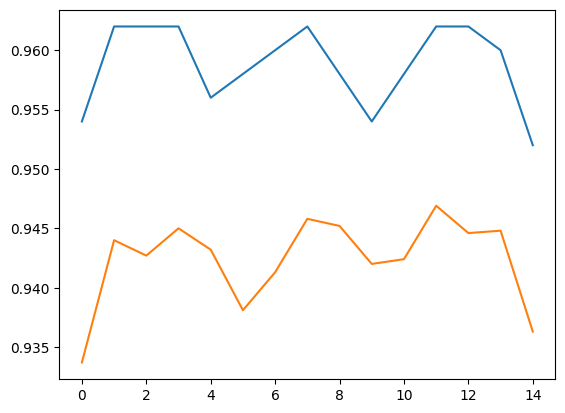

In [62]:
plt.plot([i for i in range(15)], np.array(test_acc)/500)
plt.plot([i for i in range(15)], np.array(training_acc)/10000)